In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sqlite3

In [10]:
df=pd.read_csv('dataset1.csv')

In [11]:
df

,Unnamed: 0,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePayloadAsBase64,sourcePayloadAsUTF,direction,sourceTCPFlagsDescription,...,source,protocolName,sourcePort,destination,startDateTime,stopDateTime,Tag,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort
0,0,Unknown_UDP,2633658,0,0,28971,NaN,NaN,L2R,NaN,...,192.168.5.122,udp_ip,5353,224.0.0.251,2010-06-12T23:57:24,2010-06-13T09:24:52,Normal,NaN,NaN,5353
1,1,Unknown_UDP,2633658,0,0,28971,NaN,NaN,L2R,NaN,...,192.168.5.122,udp_ip,5353,224.0.0.251,2010-06-12T23:57:24,2010-06-13T09:24:52,Normal,NaN,NaN,5353
2,2,HTTPWeb,64,128,2,1,NaN,NaN,L2L,"F,A",...,192.168.2.113,tcp_ip,4191,192.168.5.122,2010-06-12T23:57:38,2010-06-12T23:59:20,Normal,NaN,NaN,80
3,3,HTTPWeb,64,128,2,1,NaN,NaN,L2L,"F,A",...,192.168.2.113,tcp_ip,4191,192.168.5.122,2010-06-12T23:57:38,2010-06-12T23:59:20,Normal,NaN,NaN,80
4,4,HTTPWeb,128,64,1,2,NaN,NaN,L2R,"F,A",...,192.168.2.113,tcp_ip,4192,207.241.148.80,2010-06-12T23:57:40,2010-06-12T23:59:20,Normal,NaN,NaN,80
5,5,HTTPWeb,128,64,1,2,NaN,NaN,L2R,"F,A",...,192.168.2.113,tcp_ip,4192,207.241.148.80,2010-06-12T23:57:40,2010-06-12T23:59:20,Normal,NaN,NaN,80
6,6,HTTPImageTransfer,128,128,2,2,NaN,NaN,L2R,"F,A",...,192.168.2.110,tcp_ip,1864,216.49.88.12,2010-06-12T23:57:42,2010-06-12T23:59:22,Normal,NaN,NaN,80
7,7,HTTPImageTransfer,128,128,2,2,NaN,NaN,L2R,"F,A",...,192.168.2.110,tcp_ip,1864,216.49.88.12,2010-06-12T23:57:42,2010-06-12T23:59:22,Normal,NaN,NaN,80
8,8,SecureWeb,64,0,0,1,NaN,NaN,L2R,"F,A",...,192.168.2.113,tcp_ip,4186,63.245.209.72,2010-06-12T23:58:11,2010-06-12T23:59:07,Normal,NaN,NaN,443
9,9,SecureWeb,64,0,0,1,NaN,NaN,L2R,"F,A",...,192.168.2.113,tcp_ip,4186,63.245.209.72,2010-06-12T23:58:11,2010-06-12T23:59:07,Normal,NaN,NaN,443


In [12]:
print(df.columns)
print(df.shape)

Index(['Unnamed: 0', 'appName', 'totalSourceBytes', 'totalDestinationBytes',
       'totalDestinationPackets', 'totalSourcePackets',
       'sourcePayloadAsBase64', 'sourcePayloadAsUTF', 'direction',
       'sourceTCPFlagsDescription', 'destinationTCPFlagsDescription', 'source',
       'protocolName', 'sourcePort', 'destination', 'startDateTime',
       'stopDateTime', 'Tag', 'destinationPayloadAsBase64',
       'destinationPayloadAsUTF', 'destinationPort'],
      dtype='object')
(839812, 21)


In [13]:
df['bucket']=df['Unnamed: 0'] 
del df['Unnamed: 0']
df.head(5)

,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePayloadAsBase64,sourcePayloadAsUTF,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,...,protocolName,sourcePort,destination,startDateTime,stopDateTime,Tag,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,bucket
0,Unknown_UDP,2633658,0,0,28971,NaN,NaN,L2R,NaN,NaN,...,udp_ip,5353,224.0.0.251,2010-06-12T23:57:24,2010-06-13T09:24:52,Normal,NaN,NaN,5353,0
1,Unknown_UDP,2633658,0,0,28971,NaN,NaN,L2R,NaN,NaN,...,udp_ip,5353,224.0.0.251,2010-06-12T23:57:24,2010-06-13T09:24:52,Normal,NaN,NaN,5353,1
2,HTTPWeb,64,128,2,1,NaN,NaN,L2L,"F,A",R,...,tcp_ip,4191,192.168.5.122,2010-06-12T23:57:38,2010-06-12T23:59:20,Normal,NaN,NaN,80,2
3,HTTPWeb,64,128,2,1,NaN,NaN,L2L,"F,A",R,...,tcp_ip,4191,192.168.5.122,2010-06-12T23:57:38,2010-06-12T23:59:20,Normal,NaN,NaN,80,3
4,HTTPWeb,128,64,1,2,NaN,NaN,L2R,"F,A","F,A",...,tcp_ip,4192,207.241.148.80,2010-06-12T23:57:40,2010-06-12T23:59:20,Normal,NaN,NaN,80,4


In [14]:
df.groupby('Tag').mean()

,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePort,destinationPort,bucket
Tag,,,,,,,
Attack,7009.385313,106763.268152,120.959200,57.118060,20947.040178,2738.295496,164682.772407
Normal,2461.697757,31175.443510,27.290161,18.612075,14332.054182,3840.013693,103496.638772


In [15]:
df.groupby('totalSourceBytes').mean()

,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePort,destinationPort,bucket
totalSourceBytes,,,,,,
0,8.011171e+02,3.556628,0.0,10037.122265,527.566281,106458.025097
64,8.493875e+01,1.266353,1.0,35253.305131,4722.449667,161574.872650
66,8.671062e+01,1.348121,1.0,5930.539433,22358.901109,103393.641816
67,1.540000e+02,1.000000,1.0,34976.000000,14311.500000,7857.500000
68,1.705000e+02,1.000000,1.0,44379.333333,12172.000000,84102.166667
69,5.300000e+02,2.000000,1.0,50675.000000,53.000000,11734.000000
70,2.607895e+02,1.368421,1.0,47483.157895,1709.526316,94317.526316
71,3.945455e+02,2.000000,1.0,11973.818182,53.000000,58326.363636
72,2.642800e+02,1.320000,1.0,17636.620000,53.000000,137040.300000


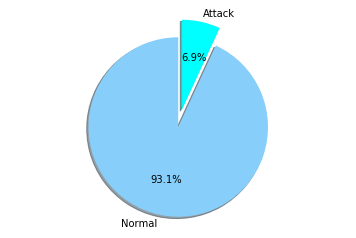

In [16]:
count_Class = pd.value_counts(df.Tag, sort = True)

# Data to Plot
labels = 'Normal', 'Attack'
sizes = [781994, 57818]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [18]:
df['Tag'].head(5)

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Tag, dtype: object

In [20]:
df['label'] = df["Tag"].apply(lambda x:1 if x=="Normal" else 0)
df['label'].head(5)

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [21]:
df= df[['totalSourceBytes', 'totalDestinationBytes', 'totalDestinationPackets', 'totalSourcePackets', 'totalSourcePackets', 'label']]

In [22]:
df

,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,totalSourcePackets,label
0,2633658,0,0,28971,28971,1
1,2633658,0,0,28971,28971,1
2,64,128,2,1,1,1
3,64,128,2,1,1,1
4,128,64,1,2,2,1
5,128,64,1,2,2,1
6,128,128,2,2,2,1
7,128,128,2,2,2,1
8,64,0,0,1,1,1
9,64,0,0,1,1,1


In [23]:
x= df.iloc[:,:-1].values
y= df.iloc[:, -1].values

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import FeatureHasher
from sklearn.ensemble import ExtraTreesClassifier

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
prediction = dict()

[[-0.00283374 -0.07327288 -0.03867259 -0.02473065 -0.02473065]
 [-0.00176394 -0.01159016 -0.0106364  -0.00822933 -0.00822933]
 [ 0.0061781   0.2591007   0.18695195  0.08627826  0.08627826]
 ...
 [-0.00284553 -0.07231077 -0.03867259 -0.02473065 -0.02473065]
 [-0.00282731 -0.07347522 -0.03867259 -0.02473065 -0.02473065]
 [-0.00292164 -0.07512898 -0.04534787 -0.02623077 -0.02623077]]


In [27]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
prediction['DecisionTree'] = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, prediction['DecisionTree']))

print("_"*101)
print(" Decision Tree: \n")
print(classification_report(y_test, prediction['DecisionTree']))
accuracy_Log = accuracy_score(y_test, prediction['DecisionTree'])
prediction['DecisionTree']= accuracy_Log * 100
print("_"*101)

Accuracy: 0.9791680310544584
_____________________________________________________________________________________________________
 Decision Tree: 

              precision    recall  f1-score   support

           0       0.88      0.80      0.84     11363
           1       0.99      0.99      0.99    156600

    accuracy                           0.98    167963
   macro avg       0.93      0.89      0.91    167963
weighted avg       0.98      0.98      0.98    167963

_____________________________________________________________________________________________________


In [28]:
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
import seaborn as sb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("_"*101)
print(" regression logistic: \n")
print(classification_report(y_test, y_pred))
accuracy_Log = accuracy_score(y_test, y_pred)
y_pred= accuracy_Log * 100
print("_"*101)



C:\Users\Jojo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


_____________________________________________________________________________________________________
 regression logistic: 

              precision    recall  f1-score   support

           0       0.82      0.63      0.72     11363
           1       0.97      0.99      0.98    156600

    accuracy                           0.97    167963
   macro avg       0.90      0.81      0.85    167963
weighted avg       0.96      0.97      0.96    167963

_____________________________________________________________________________________________________


[1 1 1 ... 1 0 1]

The accuracy of Random Forest is 98.82176431714127%

 [[ 10032   1331]
 [   648 155952]]


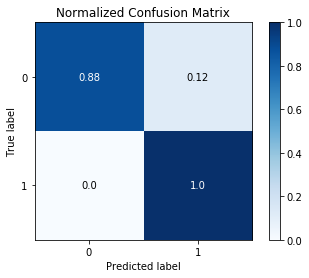

In [29]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


RF = RandomForestClassifier(n_estimators = 100, oob_score = True)
# n_estimators - количество деревьев в лесе
# oob_score - использовать ли образцы вне примеров для оценки точности обобщения
RF.fit(x_train, y_train)
predicted_values_RF = RF.predict(x_test)
print(predicted_values_RF)
accuracy_RF = accuracy_score(y_test, predicted_values_RF)
prediction['Random Forest'] = accuracy_RF * 100
print("\nThe accuracy of Random Forest is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(y_test, predicted_values_RF)
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(y_test, predicted_values_RF, normalize = True)
plt.show()



In [30]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

RF = RandomForestClassifier(n_estimators = 100, oob_score = True)
RF.fit(x_train, y_train)
prediction['random forest'] = RF.predict(x_test)

print("_"*101)
print(" RandomForest Rapport: \n")
print(classification_report(y_test,prediction['random forest']))
accuracy_knn = accuracy_score(y_test, prediction['random forest'])
prediction['random forest']= accuracy_knn * 100

print("_"*101)

_____________________________________________________________________________________________________
 RandomForest Rapport: 

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     11363
           1       0.99      1.00      0.99    156600

    accuracy                           0.99    167963
   macro avg       0.97      0.94      0.95    167963
weighted avg       0.99      0.99      0.99    167963

_____________________________________________________________________________________________________
